# **Escuela Politecnica Nacional**

# **Taller 02**

## **Nombres:** Sebastián Morales, Moisés Pineda

### **Link al Repositorio:** https://github.com/SebastianMoralesEpn/Github1.0/tree/a57e5df88b488cf19bdecacc73edb6d0343774a6/Taller%2002

In [2]:
import numpy as np
import scipy.optimize as opt

# Definir el polinomio y su derivada
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def df(x):
    return 4*x**3 + 3*540*x**2 + 2*109124*x + 9781632

# Aproximaciones iniciales para la búsqueda de raíces
x0_values = [-600, -400, -200, 0, 200, 400]

# Encontrar raíces con el método de Newton
roots = [opt.newton(f, x0, fprime=df) for x0 in x0_values]

print(f"Raíces encontradas: {roots}")


Raíces encontradas: [-151.99999999996197, -152.00000000000026, -152.0000000000245, -126.00000264456945, -125.9999766020633, -126.0000168012077]


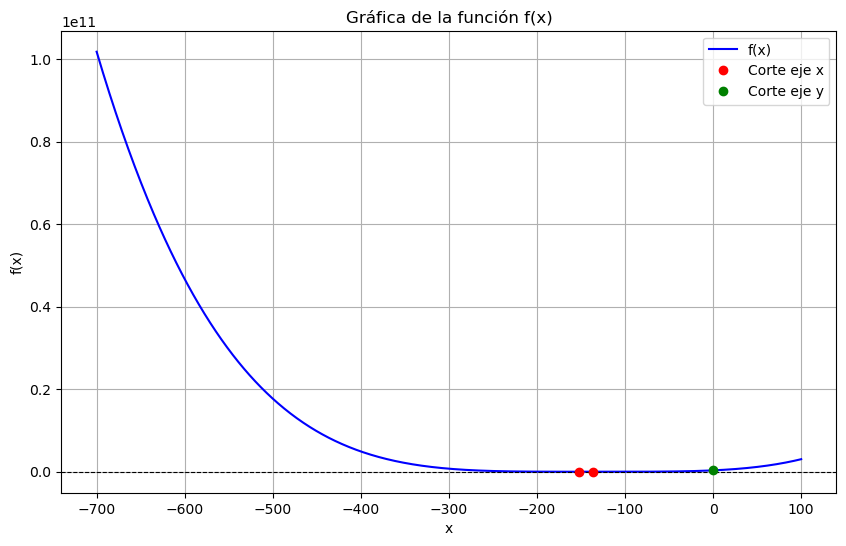

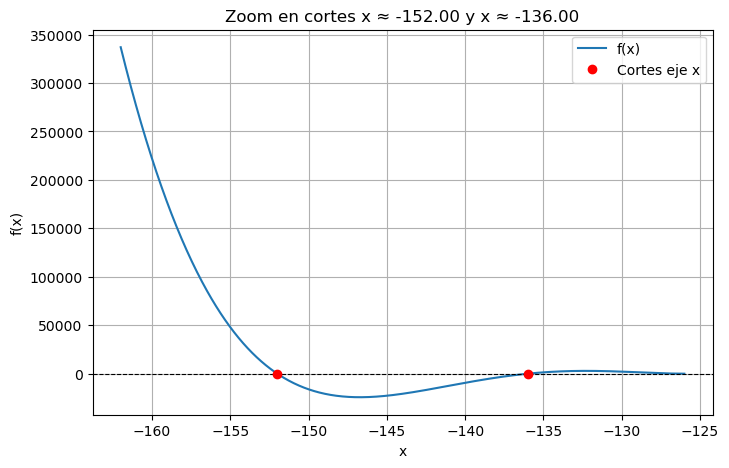

In [1]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Definir la función f(x)
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

# Crear un rango de valores para x
x_vals = np.linspace(-700, 100, 1000)  # Más puntos para una gráfica suave
y_vals = f(x_vals)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea horizontal en y=0
plt.title('Gráfica de la función f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
# Mostrar todos los cortes de la función en el eje x (raíces) y en el eje y (intersección con y)
# Cortes con el eje x (donde f(x) = 0)

# Buscar intervalos donde la función cambia de signo
x_cortes = []
for i in range(len(x_vals)-1):
    if y_vals[i]*y_vals[i+1] < 0:
        try:
            x_corte = brentq(f, x_vals[i], x_vals[i+1])
            x_cortes.append(x_corte)
        except ValueError:
            pass

# Cortes con el eje y (donde x = 0)
y_corte = f(0)

# Graficar los cortes
for x_corte in x_cortes:
    plt.plot(x_corte, 0, 'ro', label='Corte eje x' if x_corte == x_cortes[0] else "")
plt.plot(0, y_corte, 'go', label='Corte eje y')

plt.legend()
# Función para hacer zoom en torno a los puntos rojos (cortes con el eje x)
def zoom_en_cortes(x_cortes, margen=10):
    for x_corte in x_cortes:
        plt.figure(figsize=(6, 4))
        # Definir el rango de zoom alrededor del corte
        x_zoom = np.linspace(x_corte - margen, x_corte + margen, 500)
        y_zoom = f(x_zoom)
        plt.plot(x_zoom, y_zoom, label='f(x)')
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
        plt.plot(x_corte, 0, 'ro', label='Corte eje x')
        plt.title(f'Zoom en corte x ≈ {x_corte:.2f}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.legend()
        plt.show()

plt.show()
# Hacer zoom en torno a los dos puntos de corte en la misma gráfica
if len(x_cortes) >= 2:
    margen = 10
    x_min = min(x_cortes) - margen
    x_max = max(x_cortes) + margen
    x_zoom = np.linspace(x_min, x_max, 1000)
    y_zoom = f(x_zoom)
    plt.figure(figsize=(8, 5))
    plt.plot(x_zoom, y_zoom, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.plot(x_cortes, [0]*len(x_cortes), 'ro', label='Cortes eje x')
    plt.title(f'Zoom en cortes x ≈ {x_cortes[0]:.2f} y x ≈ {x_cortes[1]:.2f}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()
